In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv(r"C:\Users\Aditya kumar Dubey\OneDrive\Apps\Documents\Desktop\Data\wine_data.csv",usecols = [0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']

In [14]:
df

,Class label,Alcohol,Malic acid
0,1,13.20,1.78
1,1,13.16,2.36
2,1,14.37,1.95
3,1,13.24,2.59
4,1,14.20,1.76
...,...,...,...
172,3,13.71,5.65
173,3,13.40,3.91
174,3,13.27,4.28
175,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

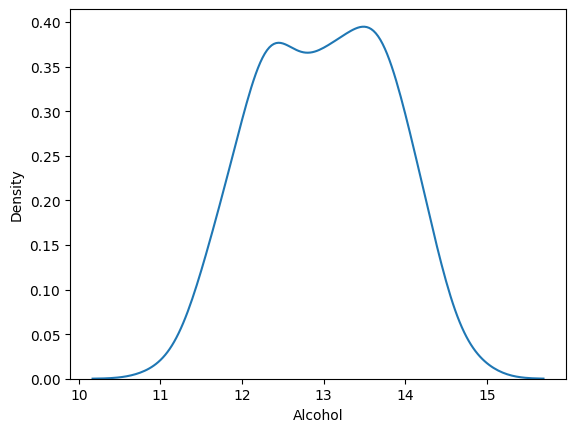

In [15]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

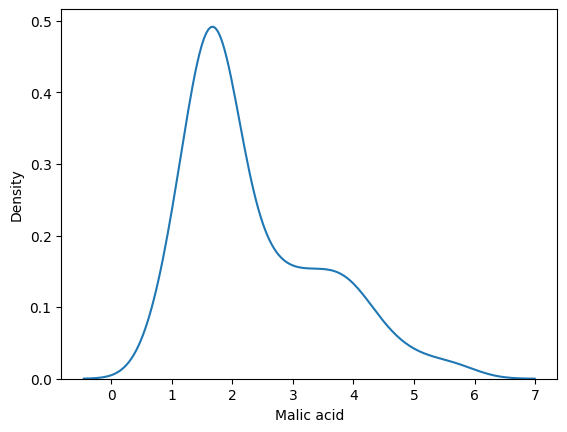

In [16]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

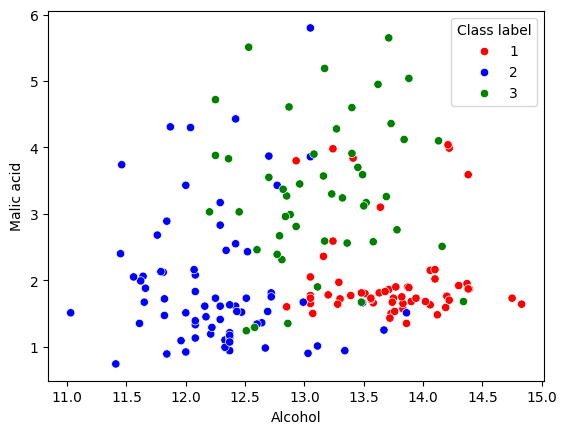

In [21]:
color_dict={1:'red',3:'green',2:'blue'}
sns.scatterplot(x = df['Alcohol'],y = df['Malic acid'],hue=df['Class label'],palette=color_dict)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1),
                                                    df['Class label'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((123, 2), (54, 2))

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [25]:
np.round(X_train.describe(), 1)

,Alcohol,Malic acid
count,123.0,123.0
mean,13.0,2.3
std,0.8,1.2
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.8
75%,13.6,3.1
max,14.8,5.8


In [26]:
np.round(X_train_scaled.describe(), 1)

,Alcohol,Malic acid
count,123.0,123.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.1
50%,0.5,0.2
75%,0.7,0.4
max,1.0,1.0


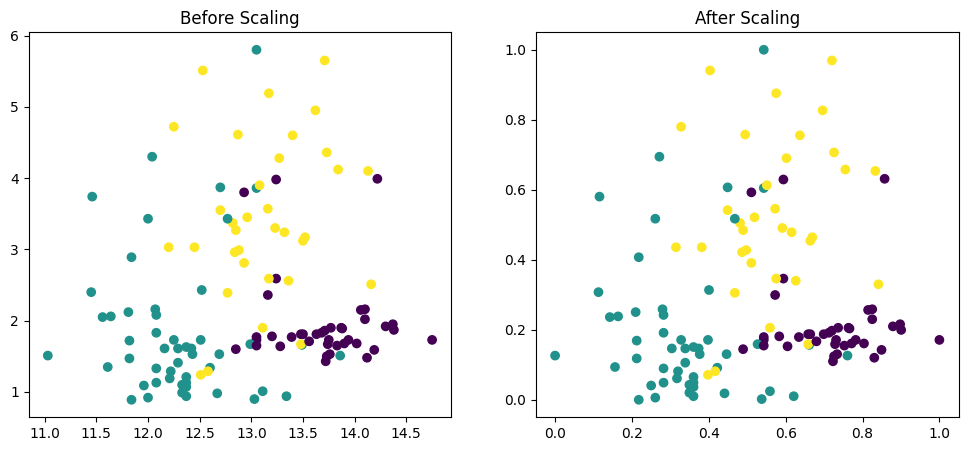

In [27]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

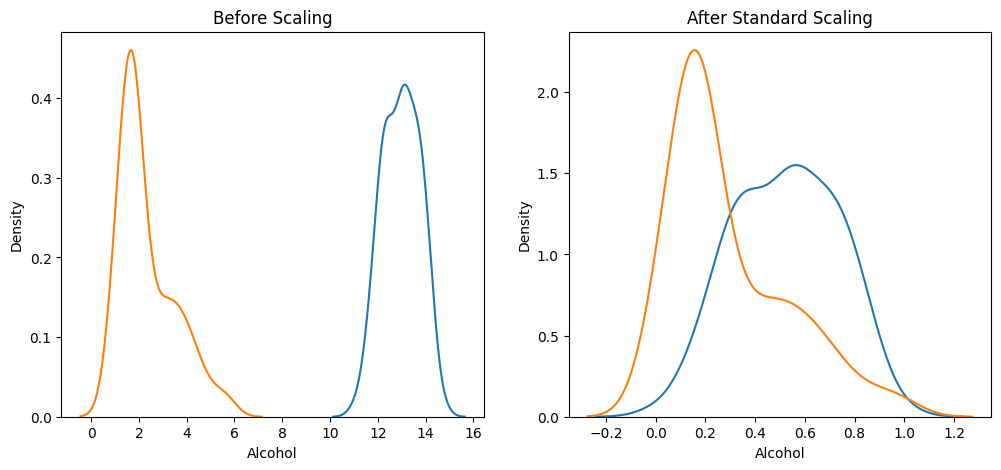

In [28]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

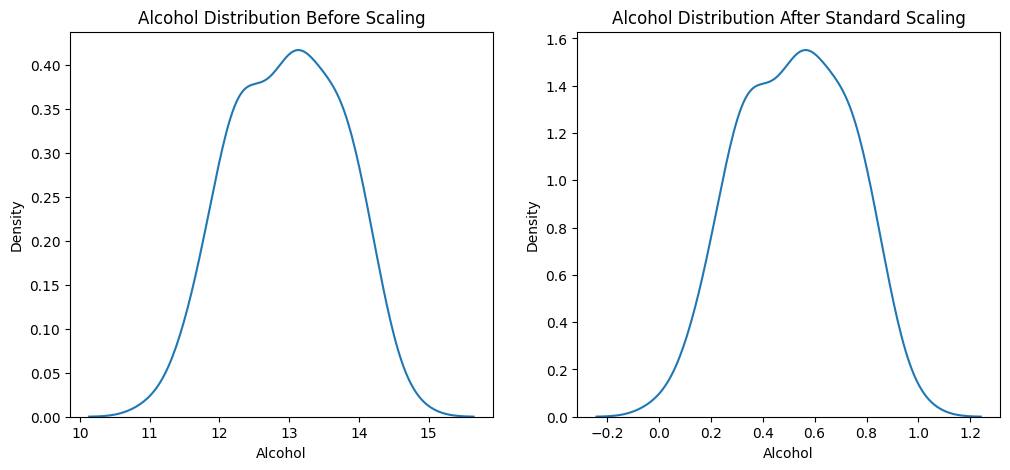

In [29]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
plt.show()